In [1]:
import gym
import ray
from ray.rllib.agents.ppo import PPOTrainer

import numpy as np
from matplotlib import pyplot as plt
from IPython import display

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
ray.init()

2021-04-27 14:36:30,335	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '192.168.1.38',
 'raylet_ip_address': '192.168.1.38',
 'redis_address': '192.168.1.38:6379',
 'object_store_address': 'tcp://127.0.0.1:65150',
 'raylet_socket_name': 'tcp://127.0.0.1:65426',
 'webui_url': '127.0.0.1:8265',
 'session_dir': 'C:\\Users\\34685\\AppData\\Local\\Temp\\ray\\session_2021-04-27_14-36-29_807473_24008',
 'metrics_export_port': 65126,
 'node_id': 'd328d0c5cd6b3a73904d04d4247f6d1fe9e70a7d73b47c5aa7d72816'}

In [5]:
env = gym.make('CartPole-v1')
agent = PPOTrainer(config={"env": 'CartPole-v1',})
agent.restore(r"C:\Users\34685\Desktop\TFG\ray-results\CartPole-v1\PPO\PPO_CartPole-v1_7e83c_00000_0_2021-04-27_14-31-30\checkpoint_40\checkpoint-40")

(pid=22460) WARNING:tensorflow:From C:\Users\34685\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\compat\v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=22460) Instructions for updating:
(pid=22460) non-resource variables are not supported in the long term
(pid=2408) WARNING:tensorflow:From C:\Users\34685\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\compat\v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=2408) Instructions for updating:
(pid=2408) non-resource variables are not supported in the long term
(pid=22460) 2021-04-27 14:36:48,506	WARNING deprecation.py:34 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
(pid=2408) 2021-04-27 14:36:48,506	WARNING deprecation.py:3

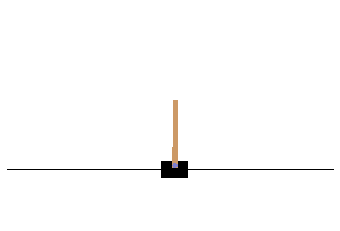

Reward: 500.0


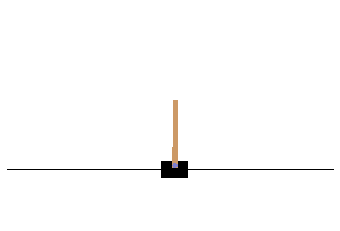

In [6]:
def watch_agent(env):
  state = env.reset()
  rewards = []
  img = plt.imshow(env.render(mode='rgb_array'))
  for t in range(2000):
    action=agent.compute_action(state)

    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.clear_output(wait=True)
    display.display(plt.gcf())

    state, reward, done, _ = env.step(action)
    rewards.append(reward)
    if done:
        print("Reward:", sum([r for r in rewards]))
        break 
  env.close()

watch_agent(env)

In [7]:
ray.shutdown()